# Seminar part 2: Using PCA to analyze the food texture data

Tên Nhóm: FairyTail

Họ tên: TRẦN XUÂN LỘC - 18127131

Họ tên: THÁI HOÀNG HUY - 18127109

## Step 1: Collecting data: Texture measurements of a pastry-type food
- Data description: Each record is taken from a batch of products, which are measured in 5 quality features.
- Food mesurements:
    - Oil: percentage oil in the pastry
    - Density: the product’s density (the higher the number, the more dense the product)
    - Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
    - Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
    - Hardness: a sharp point is used to measure the amount of force required before breakage occurs.
- Link download: https://openmv.net/info/food-texture
- Author: Kevin Dunn
- Reference: https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/pca-example-food-texture-analysis#
- Date Accessed: 20/7/2021

## Step 2: Data Wrangling
- In this step, we read the collected data and save it into pandas dataframe and visualize to assess the data distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

### Read the food texture data to pandas dataframe.

In [2]:
food = pd.read_csv('food-texture.csv')
food.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


### The shape of data: we have 50 observations and 5 mesurements

In [3]:
food.shape

(50, 6)

### We plot the data distribution of each mesurement with other by using scatter plot.

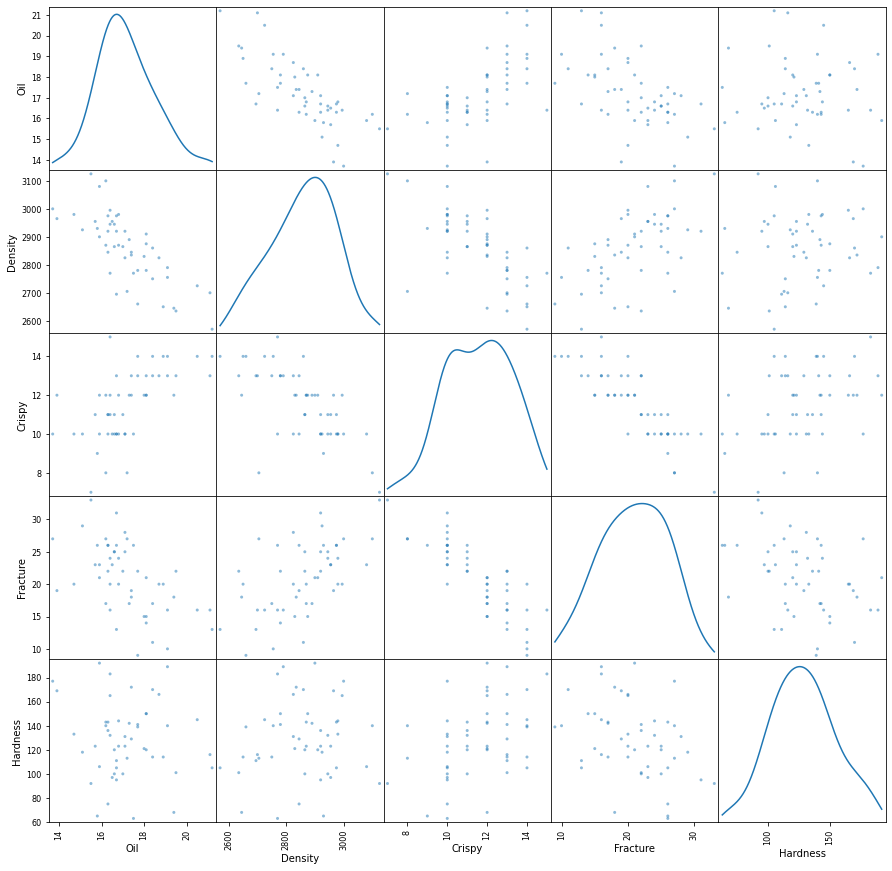

In [14]:
pd.plotting.scatter_matrix(food,figsize=(15, 15), diagonal='kde');

### Plot the boxplot to see the data distribution.

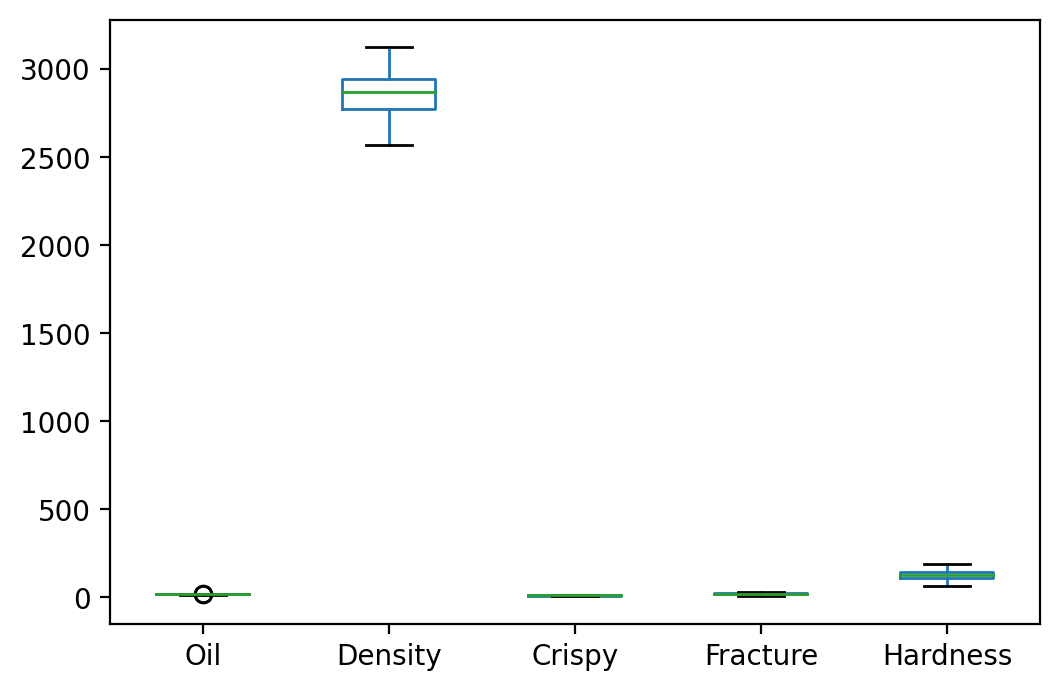

In [16]:
plt.rcParams['figure.dpi'] = 200
food.plot.box();

### Step 3: Mean-Centering and Standardlizing(if necessary)

### Extract the numerical range consist 5 attributes of data.

In [18]:
food_data = food.loc[:, 'Oil':'Hardness']
food_data.head()

,Oil,Density,Crispy,Fracture,Hardness
0,16.5,2955,10,23,97
1,17.7,2660,14,9,139
2,16.2,2870,12,17,143
3,16.7,2920,10,31,95
4,16.3,2975,11,26,143


### Subtract with the mean values of each mesurement to remove bias. Then using boxplot again to assess data distribution.

In [19]:
mean_centering = food_data - food_data.mean()
mean_centering.head()

,Oil,Density,Crispy,Fracture,Hardness
0,-0.702,97.4,-1.52,2.14,-31.18
1,0.498,-197.6,2.48,-11.86,10.82
2,-1.002,12.4,0.48,-3.86,14.82
3,-0.502,62.4,-1.52,10.14,-33.18
4,-0.902,117.4,-0.52,5.14,14.82


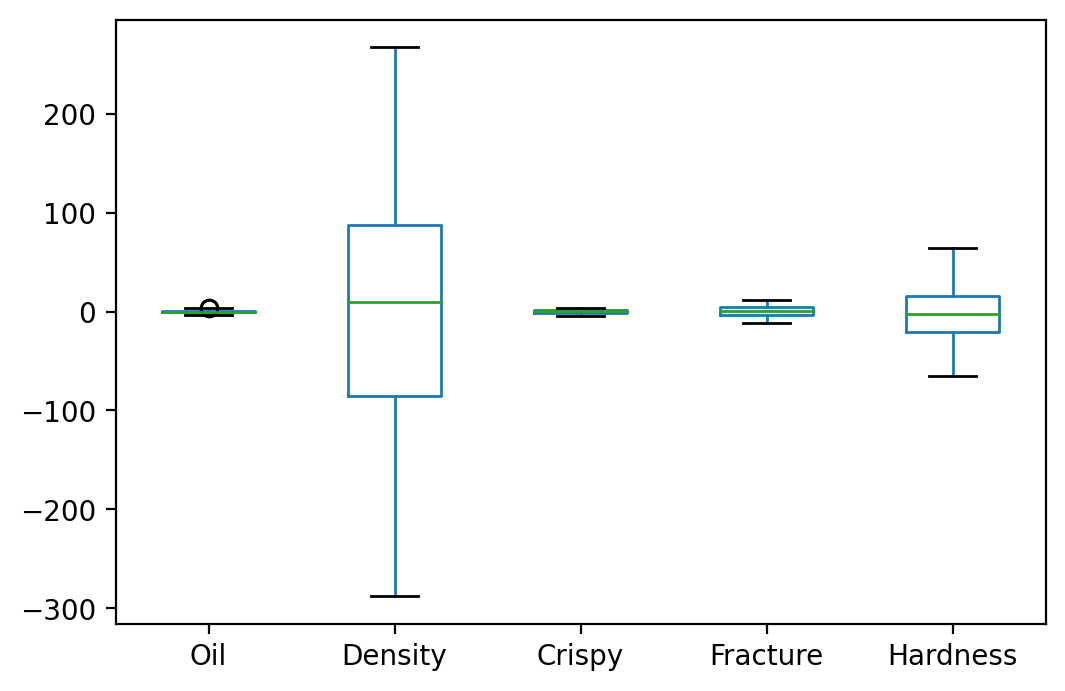

In [20]:
mean_centering.plot.box();
plt.savefig('output.png')

### As we see, althougn the mesurements were mean centering, the diverse in unit and the different between unit of mesure are very large. Thay why we need to standardlize or scale data.

In [21]:
food_standard = mean_centering / food_data.std()
food_standard.head()

,Oil,Density,Crispy,Fracture,Hardness
0,-0.440953,0.782329,-0.856063,0.391506,-1.001684
1,0.312813,-1.587149,1.396734,-2.169748,0.347602
2,-0.629394,0.099598,0.270336,-0.706174,0.476105
3,-0.315325,0.501205,-0.856063,1.855079,-1.065936
4,-0.566580,0.942972,-0.292864,0.940346,0.476105


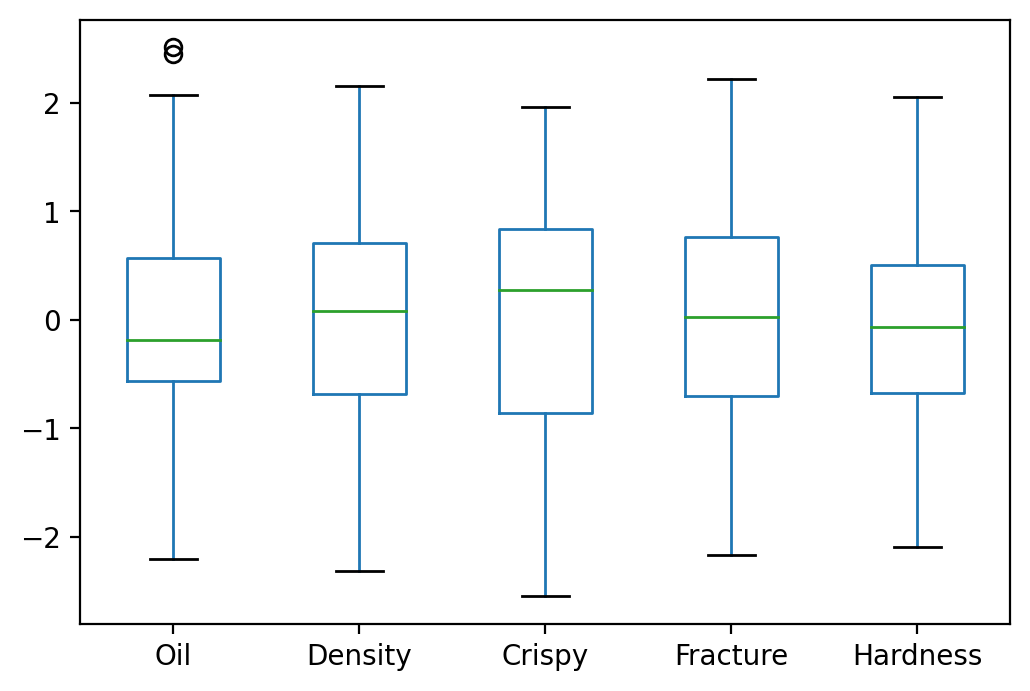

In [22]:
food_standard.plot.box();

## Step 4: Compute the covariance matrix

In [23]:
A = food_standard.to_numpy()
cov_matrix = np.dot(A.T, A)/A.shape[1]
cov_matrix

array([[ 9.8       , -7.35023511,  5.81224585, -5.23064384, -0.9412431 ],
       [-7.35023511,  9.8       , -6.57527077,  5.6068979 ,  1.05778452],
       [ 5.81224585, -6.57527077,  9.8       , -8.27085731,  4.02871536],
       [-5.23064384,  5.6068979 , -8.27085731,  9.8       , -3.65891268],
       [-0.9412431 ,  1.05778452,  4.02871536, -3.65891268,  9.8       ]])

## Step 5: Compute the eigenvalues-eigenvectors of C then stacks it in inverse order

In [24]:
eigenvals, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen values: ', eigenvals, '\n')
print('Eigen vectors', eigenvectors)

Eigen values:  [29.70588904 12.69791649  3.03848355  2.3708168   1.18689413] 

Eigen vectors [[-0.45753343  0.37043885 -0.6590302   0.46794489 -0.01204121]
 [ 0.4787455  -0.35674997 -0.01623973  0.71846318 -0.35648161]
 [-0.53238767 -0.19766103  0.17888443 -0.13252692 -0.79242064]
 [ 0.50447688  0.22123992 -0.54227938 -0.45693168 -0.44011646]
 [-0.15340262 -0.8046661  -0.48923298 -0.19618432  0.22614798]]


# Step 6: Choose the k components based on the contributed propotion of the first k eigenvals selected
- In this task, we choose thredshold is 0.8

In [25]:
contributed_percent = eigenvals / eigenvals.sum()
threshold, k = 0.8, 0
tmp = 0
for i in contributed_percent:
    tmp += i
    k += 1
    if tmp > threshold:
        break
eigenvals_selected = eigenvals[:k]
eigenvectors_selected = eigenvectors[:k]
print('Eigen values selected: ', eigenvals_selected, '\n')
print('Eigen vectors selected', eigenvectors_selected)

Eigen values selected:  [29.70588904 12.69791649] 

Eigen vectors selected [[-0.45753343  0.37043885 -0.6590302   0.46794489 -0.01204121]
 [ 0.4787455  -0.35674997 -0.01623973  0.71846318 -0.35648161]]


## Step 7: Transforming the data into new space

In [26]:
P = np.dot(A, eigenvectors_selected.T)
P

array([[ 1.25099166,  0.16206654],
       [-2.6710614 , -0.989507  ],
       [-0.18947873, -1.01832447],
       [ 1.77501877,  1.39692955],
       [ 1.23584608, -0.09701587],
       [-1.73552329, -0.58439592],
       [-1.53874237,  0.31008092],
       [ 0.68312538,  1.776594  ],
       [ 1.0996841 , -0.38541343],
       [ 0.95088153, -0.11788606],
       [-0.98851227, -0.37334399],
       [-0.56410038, -0.75784694],
       [-2.11792864, -1.44423627],
       [ 0.91535226, -2.01707359],
       [ 2.018153  ,  0.7931407 ],
       [-1.75907672, -1.28860469],
       [-2.09431902,  1.13216141],
       [-0.44571719, -0.73339136],
       [-1.55509541, -0.53494468],
       [-2.70552683, -0.72073217],
       [ 2.50107795, -1.19931058],
       [ 1.5719335 , -1.25746614],
       [-1.63401467, -0.67270171],
       [ 1.38453939,  1.44975263],
       [-1.16509313, -0.01581023],
       [-0.8945763 , -0.80433395],
       [ 1.36255554,  0.44931706],
       [ 1.13557596,  0.4079104 ],
       [-0.80326859,

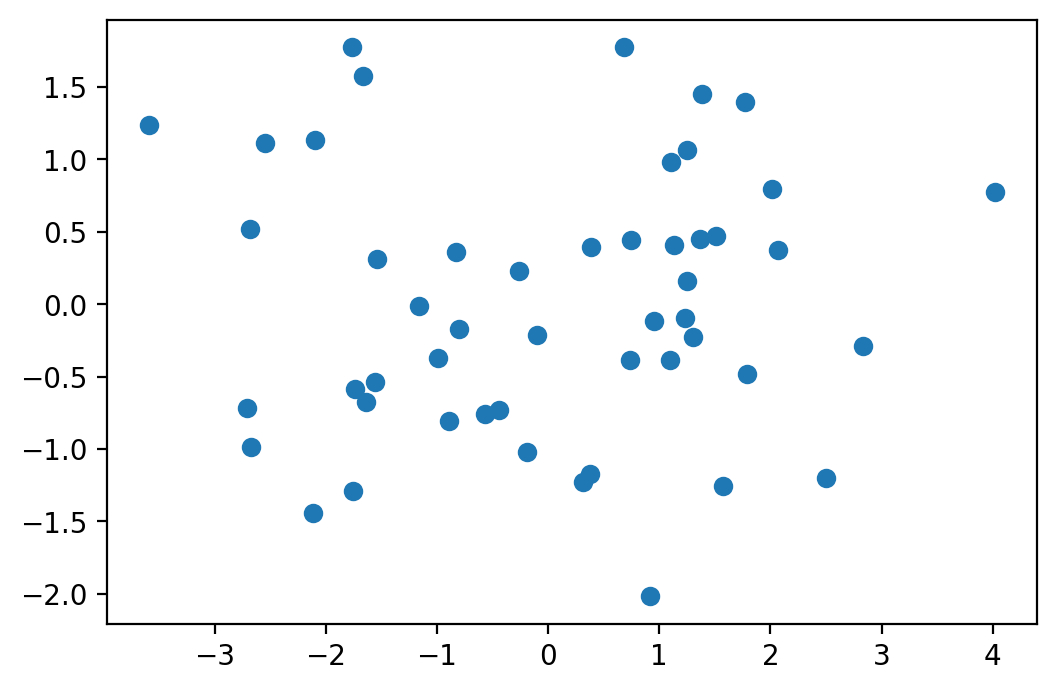

In [27]:
plt.scatter(P[:,0], P[:,1]);

## Conclusion

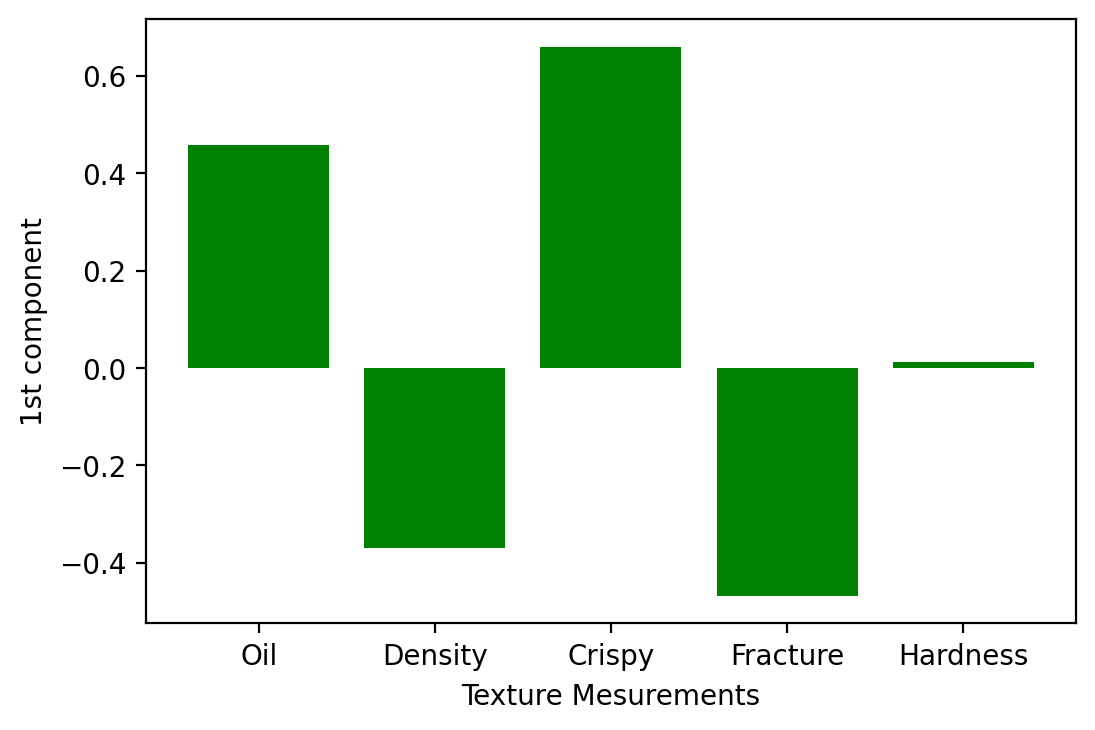

In [28]:
plt.rcParams['figure.dpi'] = 200
x = ['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness']
y = -eigenvectors_selected[0]

x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("Texture Mesurements")
plt.ylabel("1st component")
plt.bar(x_pos, y, color='green')
plt.xticks(x_pos, x)
plt.show()

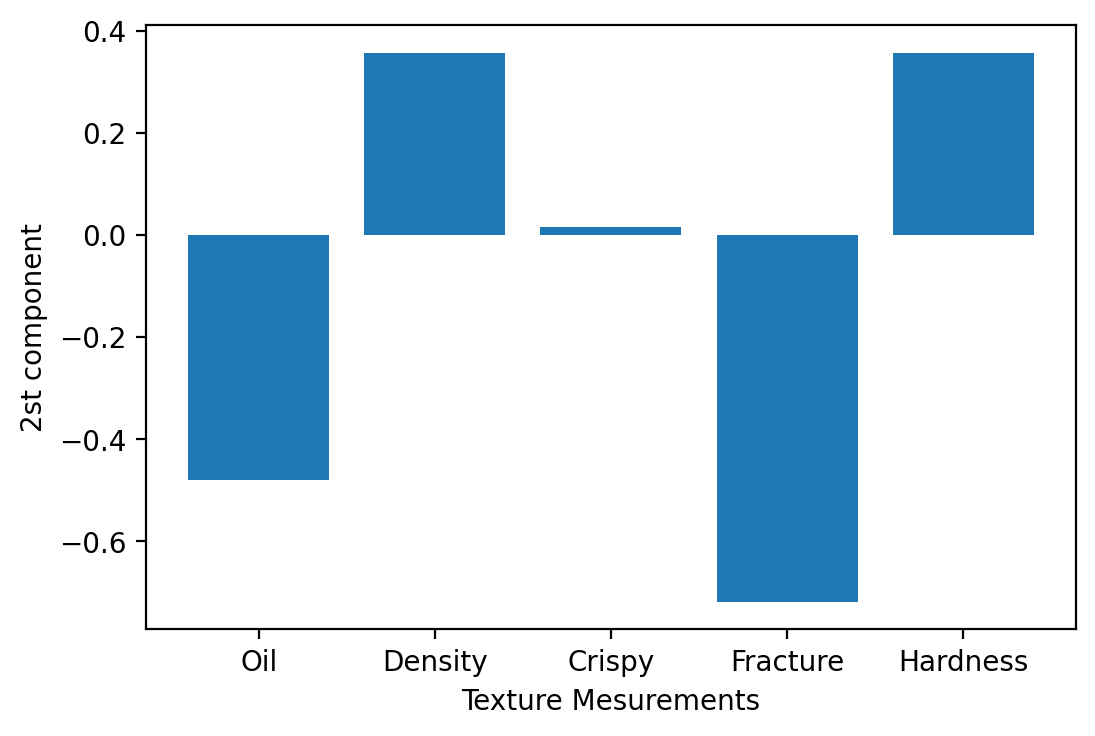

In [29]:
plt.rcParams['figure.dpi'] = 200
x = ['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness']
y = -eigenvectors_selected[1]
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("Texture Mesurements")
plt.ylabel("2st component")
plt.bar(x_pos, y)
plt.xticks(x_pos, x)
plt.savefig('output.png')
plt.show()